### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

In [14]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
data= data.dropna()
data.head(5)

,date,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [15]:
data["mese_numerico"]= np.arange(1,len(data)+1)
data.head(5)

,date,passengers,mese_numerico
0,1949-01,112.0,1
1,1949-02,118.0,2
2,1949-03,132.0,3
3,1949-04,129.0,4
4,1949-05,121.0,5


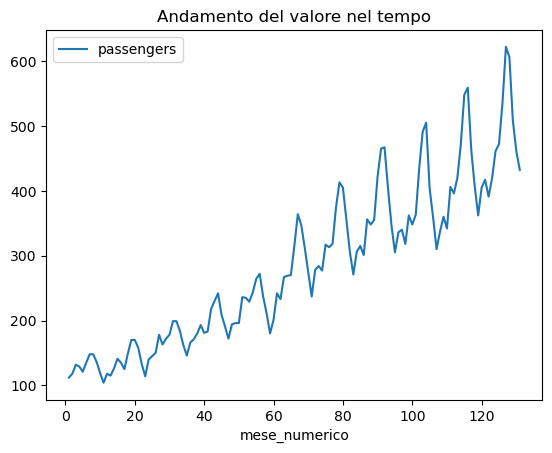

In [16]:
plot = data.plot(x="mese_numerico", y="passengers", kind="line", title="Andamento del valore nel tempo")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px


# Prepara i dati
X = data["mese_numerico"].values.reshape(-1, 1)
y = data["passengers"].values

# Trasforma i dati con PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Esegui la regressione lineare
model = LinearRegression()
model.fit(X_poly, y)

# Predici i valori
y_pred = model.predict(X_poly)

fig = px.line(data, x="mese_numerico", y="passengers")
fig.add_scatter(x=data["mese_numerico"], y=y_pred, mode='lines', name='Predizione')
fig.show()

rmse = mean_squared_error(y, y_pred)
print(f"RMSE: {rmse}")


RMSE: 1989.6245152076992


### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [40]:
import dash                      
from dash import dcc, html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.Graph(id='line-chart'),
    dcc.Slider(
        id='degree-slider',
        min=1,
        max=10,
        value=2,
        marks={i: str(i) for i in range(1, 11)},
        step=1
    )
])
@app.callback(
    Output('line-chart', 'figure'),
    Input('degree-slider', 'value')
)
def update_graph(degree):
    # Trasforma i dati con PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Esegui la regressione lineare
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predici i valori
    y_pred = model.predict(X_poly)

    fig = px.line(data, x="mese_numerico", y="passengers")
    fig.add_scatter(x=data["mese_numerico"], y=y_pred, mode='lines', name='Predizione')
    
    return fig
if __name__ == '__main__':
    app.run_server(debug=True)

